In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import shap

In [39]:
pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

In [41]:
prospects=pd.read_csv('../datasets/4_April_2024/engagements_data/final_dataset.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\812382756.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  prospects=pd.read_csv('../datasets/4_April_2024/engagements_data/final_dataset.csv')


In [43]:
prospects.shape

(152244, 46)

In [45]:
prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152244 entries, 0 to 152243
Data columns (total 46 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Email                                          152244 non-null  object 
 1   segment                                        152244 non-null  object 
 2   total_emails_sent                              152244 non-null  int64  
 3   total_emails_opened                            152244 non-null  int64  
 4   total_emails_clicked                           152244 non-null  int64  
 5   total_emails_bounced                           152244 non-null  int64  
 6   total_emails_unsubscribed                      152244 non-null  int64  
 7   avg_time_between_emails                        137445 non-null  float64
 8   avg_time_between_emails_opened                 9112 non-null    float64
 9   days_since_last_email_opened         

## Filling Null Values

In [48]:
prospects.columns

Index(['Email', 'segment', 'total_emails_sent', 'total_emails_opened',
       'total_emails_clicked', 'total_emails_bounced',
       'total_emails_unsubscribed', 'avg_time_between_emails',
       'avg_time_between_emails_opened', 'days_since_last_email_opened',
       'total_emails_sent_week_ends', 'has_ever_opened_email',
       'total_emails_sent_last_two_weeks', 'total_emails_sent_last_four_weeks',
       'total_emails_sent_last_eight_weeks',
       'total_emails_sent_last_twelve_weeks',
       'total_emails_opened_last_two_weeks',
       'total_emails_opened_last_four_weeks',
       'total_emails_opened_last_eight_weeks',
       'total_emails_opened_last_twelve_weeks', 'bounce_rate',
       'email_open_rate', 'email_click_rate', 'last_email_status',
       'has_ever_clicked_email', 'has_ever_unsubscribed_email',
       'total_email_sent_on_monday', 'total_email_sent_on_tuesday',
       'total_email_sent_on_wednesday', 'total_email_sent_on_thursday',
       'total_email_sent_on_frid

In [57]:
number_features=['total_emails_sent', 'total_emails_opened',
       'total_emails_clicked', 'total_emails_bounced',
       'total_emails_unsubscribed',
       'total_emails_sent_week_ends', 'has_ever_opened_email',
       'total_emails_sent_last_two_weeks', 'total_emails_sent_last_four_weeks',
       'total_emails_sent_last_eight_weeks',
       'total_emails_sent_last_twelve_weeks',
       'total_emails_opened_last_two_weeks',
       'total_emails_opened_last_four_weeks',
       'total_emails_opened_last_eight_weeks',
       'total_emails_opened_last_twelve_weeks', 'bounce_rate',
       'email_open_rate', 'email_click_rate', 
       'has_ever_clicked_email', 'has_ever_unsubscribed_email',
       'total_email_sent_on_monday', 'total_email_sent_on_tuesday',
       'total_email_sent_on_wednesday', 'total_email_sent_on_thursday',
       'total_email_sent_on_friday', 'total_email_sent_on_saturday',
       'total_email_sent_on_sunday', 'total_email_sent_on_morning',
       ]

In [60]:
datetime_features=['days_since_last_email_opened', 
                   'number_of_days_taken_to_open_first_email',
                   'number_of_days_elapsed_sinse_first_email_open',
                  ]

In [65]:
for feature in number_features:
    prospects[feature].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\2243843252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prospects[feature].fillna(0,inplace=True)


In [67]:
for feature in datetime_features:
    prospects[feature].fillna(9999,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\293732538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prospects[feature].fillna(9999,inplace=True)


In [69]:
prospects.isnull().sum()

Email                                                 0
segment                                               0
total_emails_sent                                     0
total_emails_opened                                   0
total_emails_clicked                                  0
total_emails_bounced                                  0
total_emails_unsubscribed                             0
avg_time_between_emails                           14799
avg_time_between_emails_opened                   143132
days_since_last_email_opened                          0
total_emails_sent_week_ends                           0
has_ever_opened_email                                 0
total_emails_sent_last_two_weeks                      0
total_emails_sent_last_four_weeks                     0
total_emails_sent_last_eight_weeks                    0
total_emails_sent_last_twelve_weeks                   0
total_emails_opened_last_two_weeks                    0
total_emails_opened_last_four_weeks             

In [71]:
prospects['last_email_status'].value_counts(dropna=False)

last_email_status
EMAIL_SENT       113365
BOUNCED           37452
EMAIL_OPENED        465
EMAIL_CLICKED       464
UNSUBSCRIBED        431
NaN                  67
Name: count, dtype: int64

In [77]:
prospects[prospects['last_email_status'].isna()]['total_emails_sent'].value_counts()

total_emails_sent
0    67
Name: count, dtype: int64

## Dropping prospects were last_email_status is null

In [84]:
prospects.dropna(subset=['last_email_status'],inplace=True)

In [94]:
prospects.drop(columns=['avg_time_between_emails','avg_time_between_emails_opened','first_email_send_date',
                       'first_email_clicked_date','first_email_opened_date'],inplace=True)

In [96]:
prospects.isnull().sum()

Email                                            0
segment                                          0
total_emails_sent                                0
total_emails_opened                              0
total_emails_clicked                             0
total_emails_bounced                             0
total_emails_unsubscribed                        0
days_since_last_email_opened                     0
total_emails_sent_week_ends                      0
has_ever_opened_email                            0
total_emails_sent_last_two_weeks                 0
total_emails_sent_last_four_weeks                0
total_emails_sent_last_eight_weeks               0
total_emails_sent_last_twelve_weeks              0
total_emails_opened_last_two_weeks               0
total_emails_opened_last_four_weeks              0
total_emails_opened_last_eight_weeks             0
total_emails_opened_last_twelve_weeks            0
bounce_rate                                      0
email_open_rate                

## Encoding Level

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [105]:

# Initialize OneHotEncoder
level_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
level_encoded = level_encoder.fit_transform(prospects[['level']])

# Retrieve the feature names
level_encoded_feature_names = level_encoder.get_feature_names_out(['level'])

# Create a DataFrame with the encoded features
level_encoded_df = pd.DataFrame(level_encoded, columns=level_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([prospects, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df


In [107]:
level_encoded_df

,level_CXO,level_Dir,level_Head,level_Mgr,level_Staff,level_Unknown,level_VP
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
152236,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152237,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152238,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152239,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Encoding Country

In [160]:

# Initialize OneHotEncoder
country_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
country_encoded = country_encoder.fit_transform(prospects[['country']])

# Retrieve the feature names
country_encoded_feature_names = country_encoder.get_feature_names_out(['country'])

# Create a DataFrame with the encoded features
country_encoded_df = pd.DataFrame(country_encoded, columns=country_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
country_encoded_df


,country_Canada,country_Mexico,country_United States,country_Unknown
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
152236,0.0,0.0,1.0,0.0
152237,0.0,0.0,1.0,0.0
152238,0.0,0.0,1.0,0.0
152239,0.0,0.0,1.0,0.0


## Encoding Department

In [163]:

# Initialize OneHotEncoder
department_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
department_encoded = department_encoder.fit_transform(prospects[['department']])

# Retrieve the feature names
department_encoded_feature_names = department_encoder.get_feature_names_out(['department'])

# Create a DataFrame with the encoded features
department_encoded_df = pd.DataFrame(department_encoded, columns=department_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
department_encoded_df


,department_After Sales Service/Support,department_Engineering,department_Executive,department_Finance,department_IT,department_Operations,department_Regulatory/Corporate Compliance,department_Sales,department_Unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
152236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152238,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Encoding Industry

In [166]:

# Initialize OneHotEncoder
industry_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
industry_encoded = industry_encoder.fit_transform(prospects[['industry']])

# Retrieve the feature names
industry_encoded_feature_names = industry_encoder.get_feature_names_out(['industry'])

# Create a DataFrame with the encoded features
industry_encoded_df = pd.DataFrame(industry_encoded, columns=industry_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
industry_encoded_df


,industry_Agriculture,industry_Business Services,industry_Construction,"industry_Electricity, Oil & Gas, Energy, Utilities & Waste",industry_Government,industry_Manufacturing,industry_Others,industry_Retail,industry_Transportation,industry_Unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
152236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152238,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Encoding revenue_range

In [173]:

# Initialize OneHotEncoder
revenue_range_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
revenue_range_encoded = revenue_range_encoder.fit_transform(prospects[['revenue_range']])

# Retrieve the feature names
revenue_range_encoded_feature_names = revenue_range_encoder.get_feature_names_out(['revenue_range'])

# Create a DataFrame with the encoded features
revenue_range_encoded_df = pd.DataFrame(revenue_range_encoded, columns=revenue_range_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
revenue_range_encoded_df


,revenue_range_0 - 1M,revenue_range_100M - 1B,revenue_range_100M - 250M,revenue_range_10B+,revenue_range_10M - 50M,revenue_range_11M - 100M,revenue_range_1B - 10B,revenue_range_1M - 10M,revenue_range_250M - 500M,revenue_range_500M - 1B,revenue_range_50M - 100M,revenue_range_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152239,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
prospects['employee_range']

In [178]:

# Initialize OneHotEncoder
employee_range_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
employee_range_encoded = employee_range_encoder.fit_transform(prospects[['employee_range']])

# Retrieve the feature names
employee_range_encoded_feature_names = employee_range_encoder.get_feature_names_out(['employee_range'])

# Create a DataFrame with the encoded features
employee_range_encoded_df = pd.DataFrame(employee_range_encoded, columns=employee_range_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
employee_range_encoded_df


,employee_range_1 - 10,"employee_range_1,001 - 5,000",employee_range_11 - 50,employee_range_201 - 500,"employee_range_5,001 - 10,000","employee_range_501 - 1,000",employee_range_51 - 200,employee_range_Unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
152236,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152239,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [204]:

# Initialize OneHotEncoder
last_email_status_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Industry' column
last_email_status_encoded = last_email_status_encoder.fit_transform(prospects[['last_email_status']])

# Retrieve the feature names
last_email_status_encoded_feature_names = last_email_status_encoder.get_feature_names_out(['last_email_status'])

# Create a DataFrame with the encoded features
last_email_status_encoded_df = pd.DataFrame(last_email_status_encoded, columns=last_email_status_encoded_feature_names, index=prospects.index)

# # Concatenate the original DataFrame and the encoded DataFrame
# level_df= pd.concat([final_df, level_encoded_df], axis=1)

# # Optionally, drop the original 'Industry' column
# level_df.drop('level', axis=1, inplace=True)

# # level_df
last_email_status_encoded_df


,last_email_status_BOUNCED,last_email_status_EMAIL_CLICKED,last_email_status_EMAIL_OPENED,last_email_status_EMAIL_SENT,last_email_status_UNSUBSCRIBED
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
152236,0.0,0.0,0.0,1.0,0.0
152237,1.0,0.0,0.0,0.0,0.0
152238,0.0,0.0,0.0,1.0,0.0
152239,0.0,0.0,0.0,1.0,0.0


In [206]:
training_df=pd.concat([prospects, level_encoded_df,country_encoded_df,department_encoded_df,
                       industry_encoded_df,employee_range_encoded_df,revenue_range_encoded_df,last_email_status_encoded_df], axis=1)

In [182]:
training_df.shape

(152177, 91)

In [184]:
prospects.shape

(152177, 41)

In [234]:
training_df.drop(columns=['level','country','industry','department','revenue_range','employee_range'],inplace=True)

In [208]:
training_df.drop(columns=['last_email_status'],inplace=True)

In [217]:
training_df.drop(columns=['Email','segment'],inplace=True)

In [281]:

training_df.drop(columns=['email_click_rate','has_ever_clicked_email'],inplace=True)

In [283]:
training_df['is_clicked_email'].value_counts()

is_clicked_email
0    143026
1      9151
Name: count, dtype: int64

In [286]:
# training_df['last_email_status'].value_counts()

In [288]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152177 entries, 0 to 152243
Data columns (total 84 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   total_emails_sent                                           152177 non-null  int64  
 1   total_emails_opened                                         152177 non-null  int64  
 2   total_emails_bounced                                        152177 non-null  int64  
 3   total_emails_unsubscribed                                   152177 non-null  int64  
 4   days_since_last_email_opened                                152177 non-null  float64
 5   total_emails_sent_week_ends                                 152177 non-null  float64
 6   has_ever_opened_email                                       152177 non-null  int64  
 7   total_emails_sent_last_two_weeks                            152177 non-null  fl

In [292]:
X_train,X_test,y_train,y_test=train_test_split(training_df.drop(columns=['is_clicked_email']),training_df.is_clicked_email,test_size=0.2,random_state=42,stratify=training_df['is_clicked_email'])

In [295]:
# {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
rf_model=RandomForestClassifier(
    class_weight= 'balanced',
    max_depth=5,
    # min_samples_leaf= 2,
    # min_samples_split= 10,
    n_estimators= 50
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

In [297]:
y_pred=rf_model.predict(X_test)

In [299]:
accuracy_score(y_test,y_pred)

0.952621895124195

In [301]:
f1_score(y_test,y_pred)

0.7173657389259114

In [304]:
confusion_matrix(y_test,y_pred)

array([[27164,  1442],
       [    0,  1830]], dtype=int64)

In [307]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28606
           1       0.56      1.00      0.72      1830

    accuracy                           0.95     30436
   macro avg       0.78      0.97      0.85     30436
weighted avg       0.97      0.95      0.96     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\3916282737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


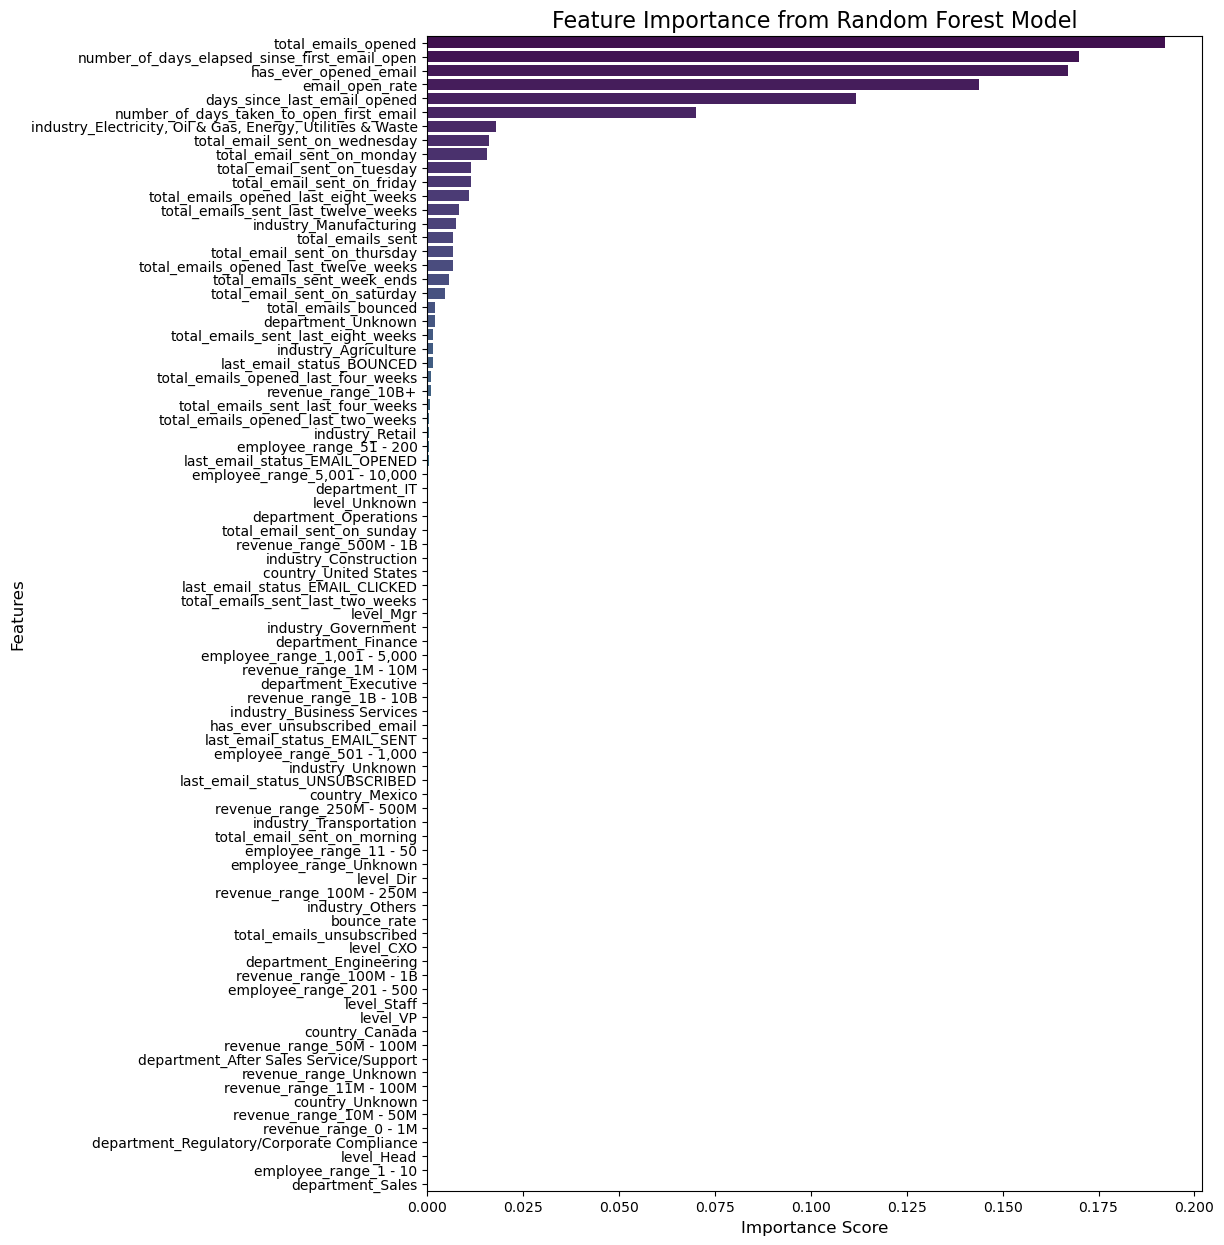

In [310]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [312]:
rf_model_explainer=shap.Explainer(rf_model,X_train,model_output="probability")

In [314]:
rf_model_shap_values = rf_model_explainer(X_test)

 99%|===================| 60547/60872 [00:31<00:00]        

In [318]:
rf_model_shap_values_class_1 = rf_model_shap_values[..., 1]

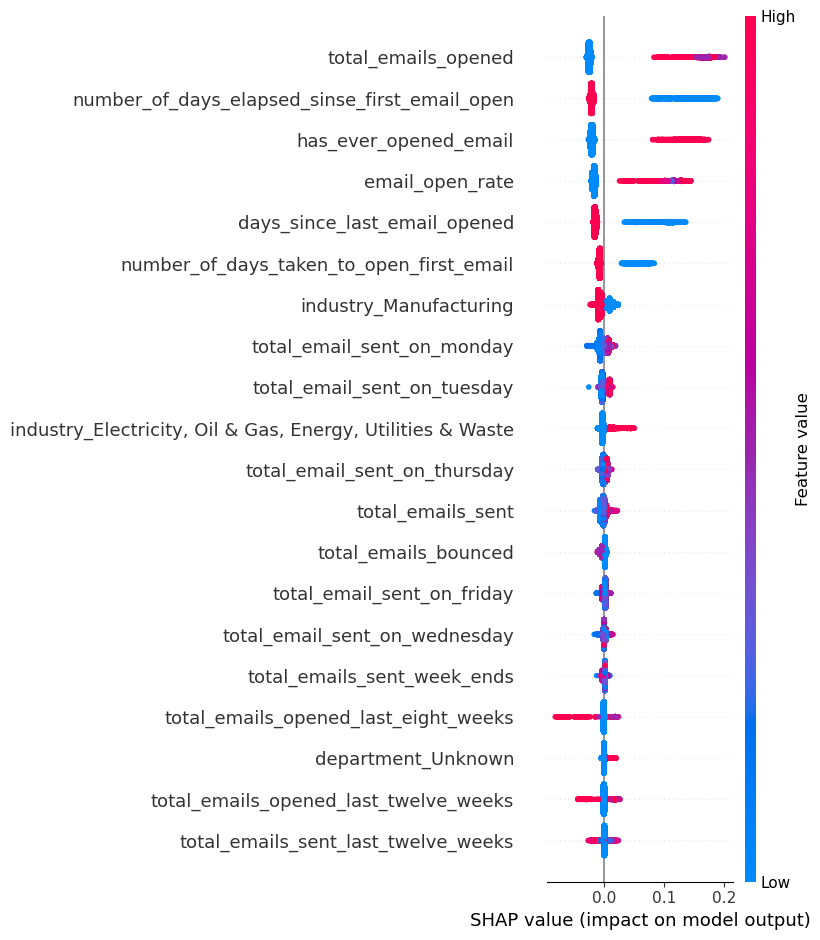

In [320]:
shap.summary_plot(rf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [390]:
dataset_2=training_df.drop(columns=['number_of_days_elapsed_sinse_first_email_open','days_since_last_email_opened',
                                   'email_open_rate'])

In [392]:
training_df['number_of_days_elapsed_sinse_first_email_open']

0          221.0
1          253.0
2          205.0
3          205.0
4          246.0
           ...  
152236    9999.0
152237    9999.0
152238    9999.0
152239    9999.0
152243     219.0
Name: number_of_days_elapsed_sinse_first_email_open, Length: 152177, dtype: float64

In [394]:
dataset_2.shape

(152177, 81)

In [397]:
X_train,X_test,y_train,y_test=train_test_split(dataset_2.drop(columns=['is_clicked_email']),dataset_2.is_clicked_email,test_size=0.2,random_state=42,stratify=dataset_2['is_clicked_email'])

In [399]:
# {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
rf_model=RandomForestClassifier(
    class_weight= 'balanced',
    max_depth=5,
    # min_samples_leaf= 2,
    # min_samples_split= 10,
    n_estimators= 50
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

In [401]:
y_pred=rf_model.predict(X_test)

In [403]:
accuracy_score(y_test,y_pred)

0.9507162570640032

In [405]:
f1_score(y_test,y_pred)

0.7093023255813954

In [407]:
confusion_matrix(y_test,y_pred)

array([[27106,  1500],
       [    0,  1830]], dtype=int64)

In [409]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28606
           1       0.55      1.00      0.71      1830

    accuracy                           0.95     30436
   macro avg       0.77      0.97      0.84     30436
weighted avg       0.97      0.95      0.96     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\3916282737.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


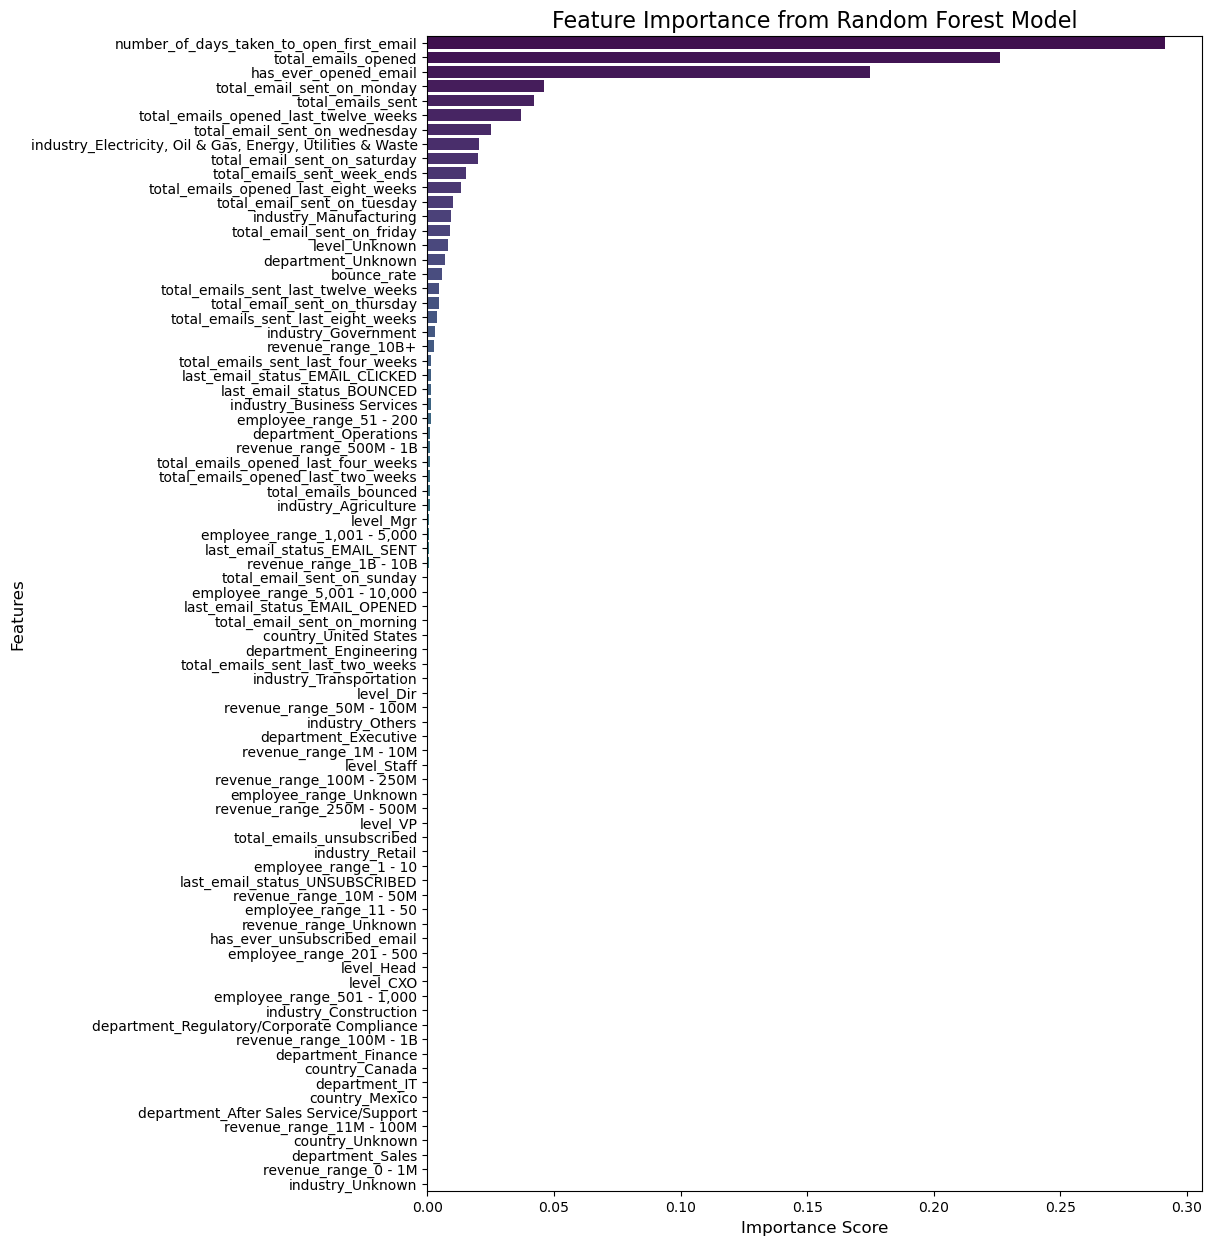

In [411]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [414]:
rf_model_explainer=shap.Explainer(rf_model,X_train,model_output="probability")

In [416]:
rf_model_shap_values = rf_model_explainer(X_test)

100%|===================| 60700/60872 [00:41<00:00]        

In [420]:
rf_model_shap_values_class_1 = rf_model_shap_values[..., 1]

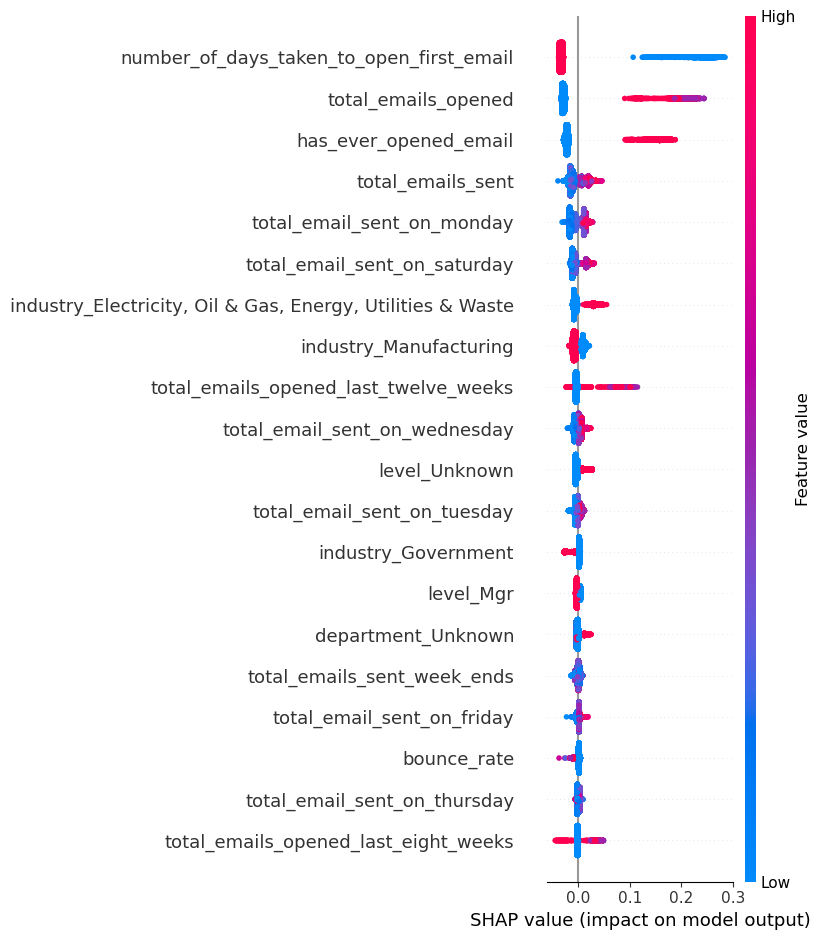

In [422]:
shap.summary_plot(rf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [424]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [428]:
brf_model=BalancedRandomForestClassifier(n_estimators=50,max_depth=5)

In [430]:
brf_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(max_depth=5, n_estimators=50)

In [432]:
y_pred=brf_model.predict(X_test)

In [434]:
accuracy_score(y_test,y_pred)

0.9504534104350112

In [436]:
f1_score(y_test,y_pred)

0.708204334365325

In [438]:
confusion_matrix(y_test,y_pred)

array([[27098,  1508],
       [    0,  1830]], dtype=int64)

In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28606
           1       0.55      1.00      0.71      1830

    accuracy                           0.95     30436
   macro avg       0.77      0.97      0.84     30436
weighted avg       0.97      0.95      0.96     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\1666366928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


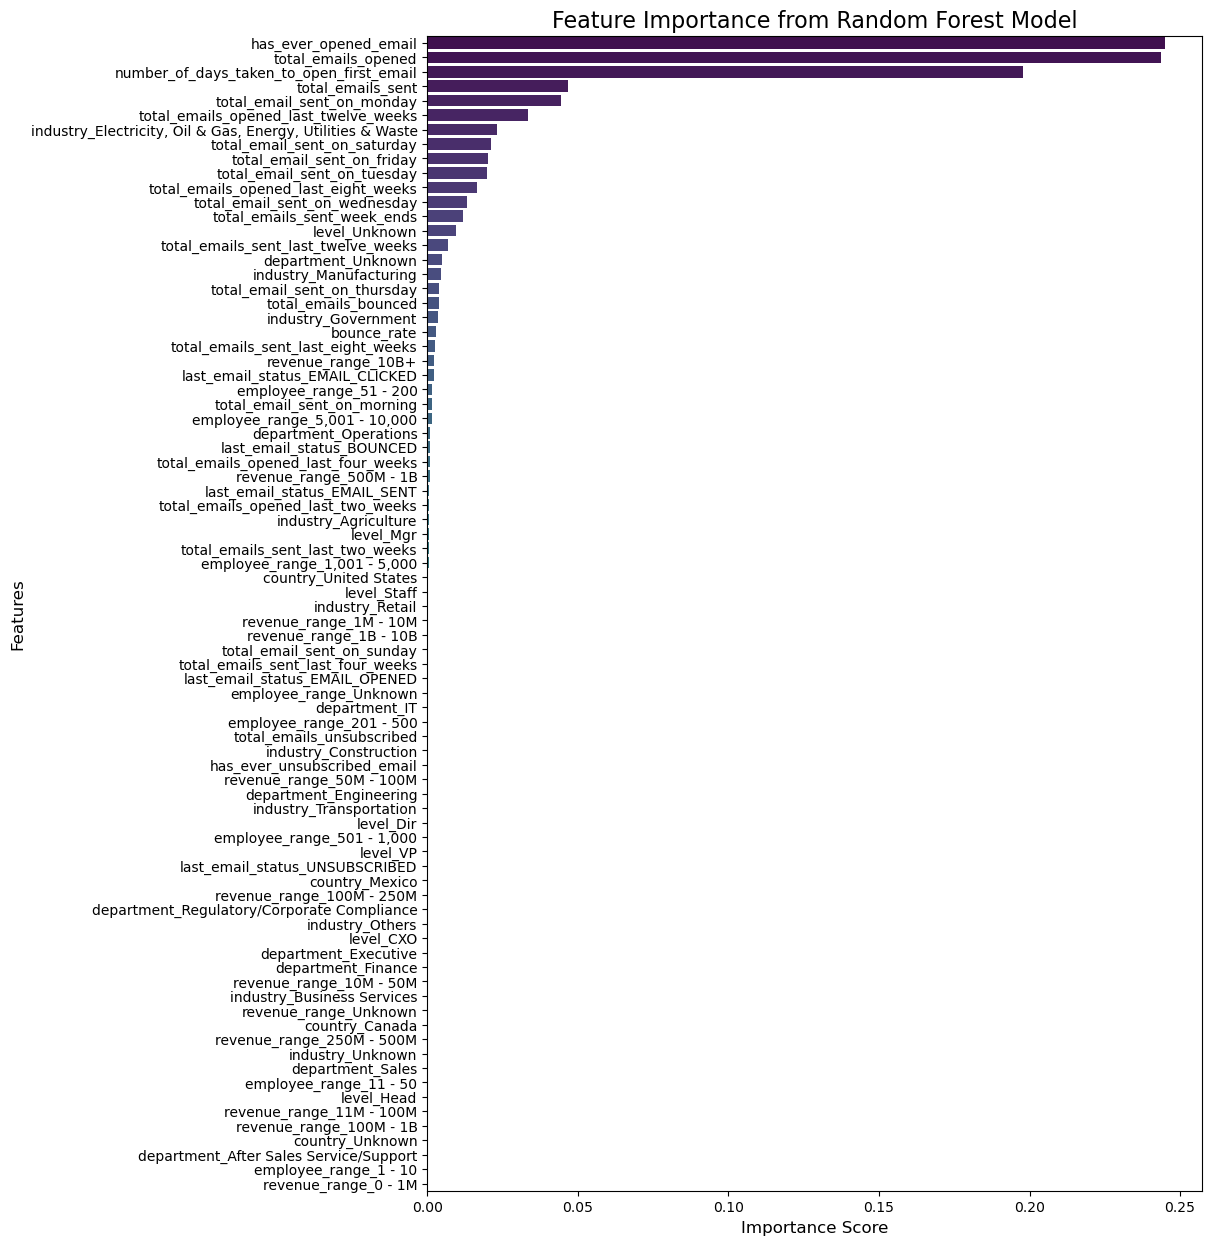

In [444]:
feature_importances = brf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [446]:
brf_model_explainer=shap.Explainer(brf_model,X_train,model_output="probability")

In [448]:
brf_model_shap_values = brf_model_explainer(X_test)

 98%|===================| 59534/60872 [00:41<00:00]        

In [480]:
brf_model_shap_values_class_1 = brf_model_shap_values[..., 1]

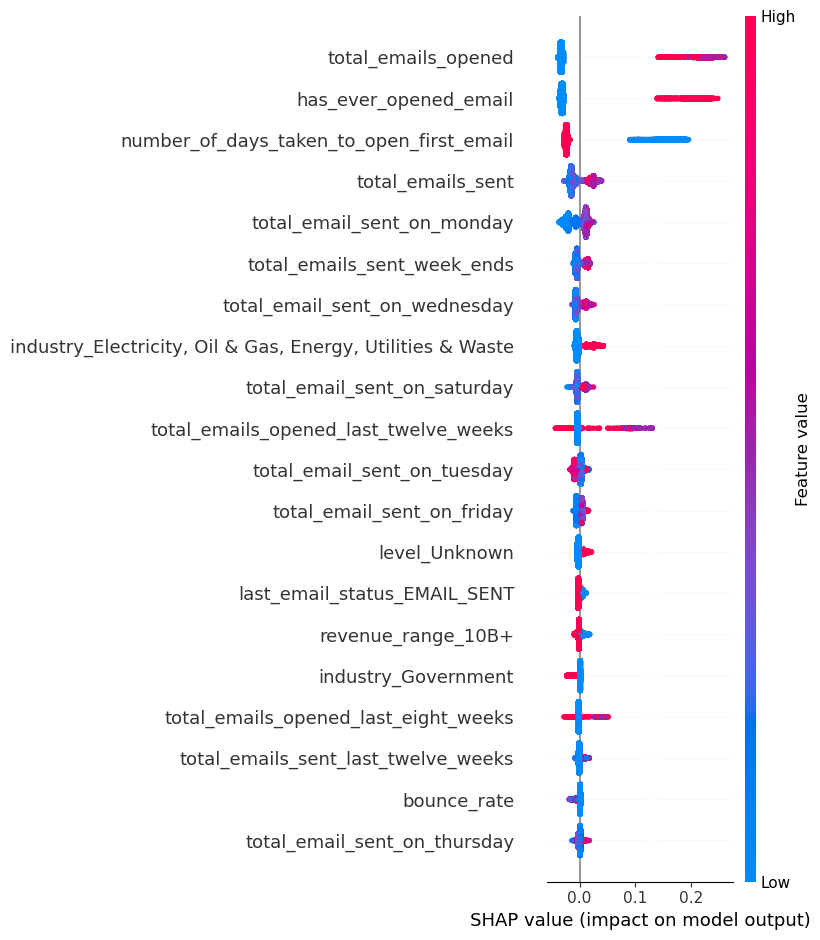

In [482]:
shap.summary_plot(brf_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [690]:
from sklearn.model_selection import learning_curve


C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin

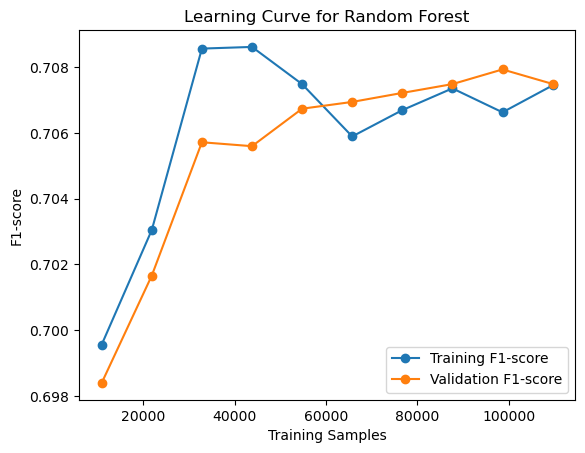

In [692]:
train_sizes, train_scores, val_scores = learning_curve(
    brf_model, X_train, y_train, cv=10, scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training F1-score", marker="o")
plt.plot(train_sizes, val_mean, label="Validation F1-score", marker="o")
plt.xlabel("Training Samples")
plt.ylabel("F1-score")
plt.legend()
plt.title("Learning Curve for Random Forest")
plt.show()

In [696]:
from sklearn.metrics import roc_curve,auc

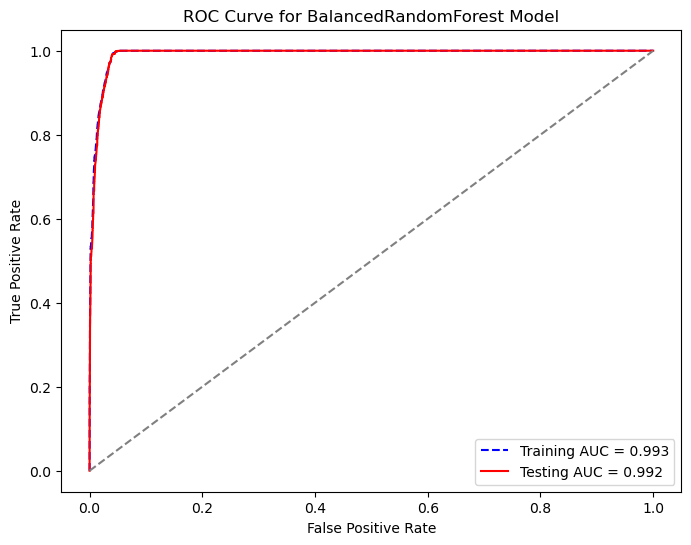

In [700]:
y_train_prob = brf_model.predict_proba(X_train)[:, 1]  # Probabilities for training data
y_test_prob = brf_model.predict_proba(X_test)[:, 1]    # Probabilities for testing data

# Compute ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Compute AUC Score
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Training AUC = {auc_train:.3f}", linestyle="--", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Testing AUC = {auc_test:.3f}", linestyle="-", color="red")

# Reference line for random classifier
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for BalancedRandomForest Model")
plt.legend()
plt.show()

### BalancedRandomForest With Class Weights

In [747]:
brfc_model=BalancedRandomForestClassifier(n_estimators=50,max_depth=5,class_weight={0:1,1:5})

In [749]:
brfc_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=5,
                               n_estimators=50)

In [751]:
y_pred=brfc_model.predict(X_test)

In [753]:
accuracy_score(y_test,y_pred)

0.9485477723748192

In [755]:
f1_score(y_test,y_pred)

0.7003444316877153

In [757]:
confusion_matrix(y_test,y_pred)

array([[27040,  1566],
       [    0,  1830]], dtype=int64)

In [759]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28606
           1       0.54      1.00      0.70      1830

    accuracy                           0.95     30436
   macro avg       0.77      0.97      0.84     30436
weighted avg       0.97      0.95      0.96     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\837313981.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


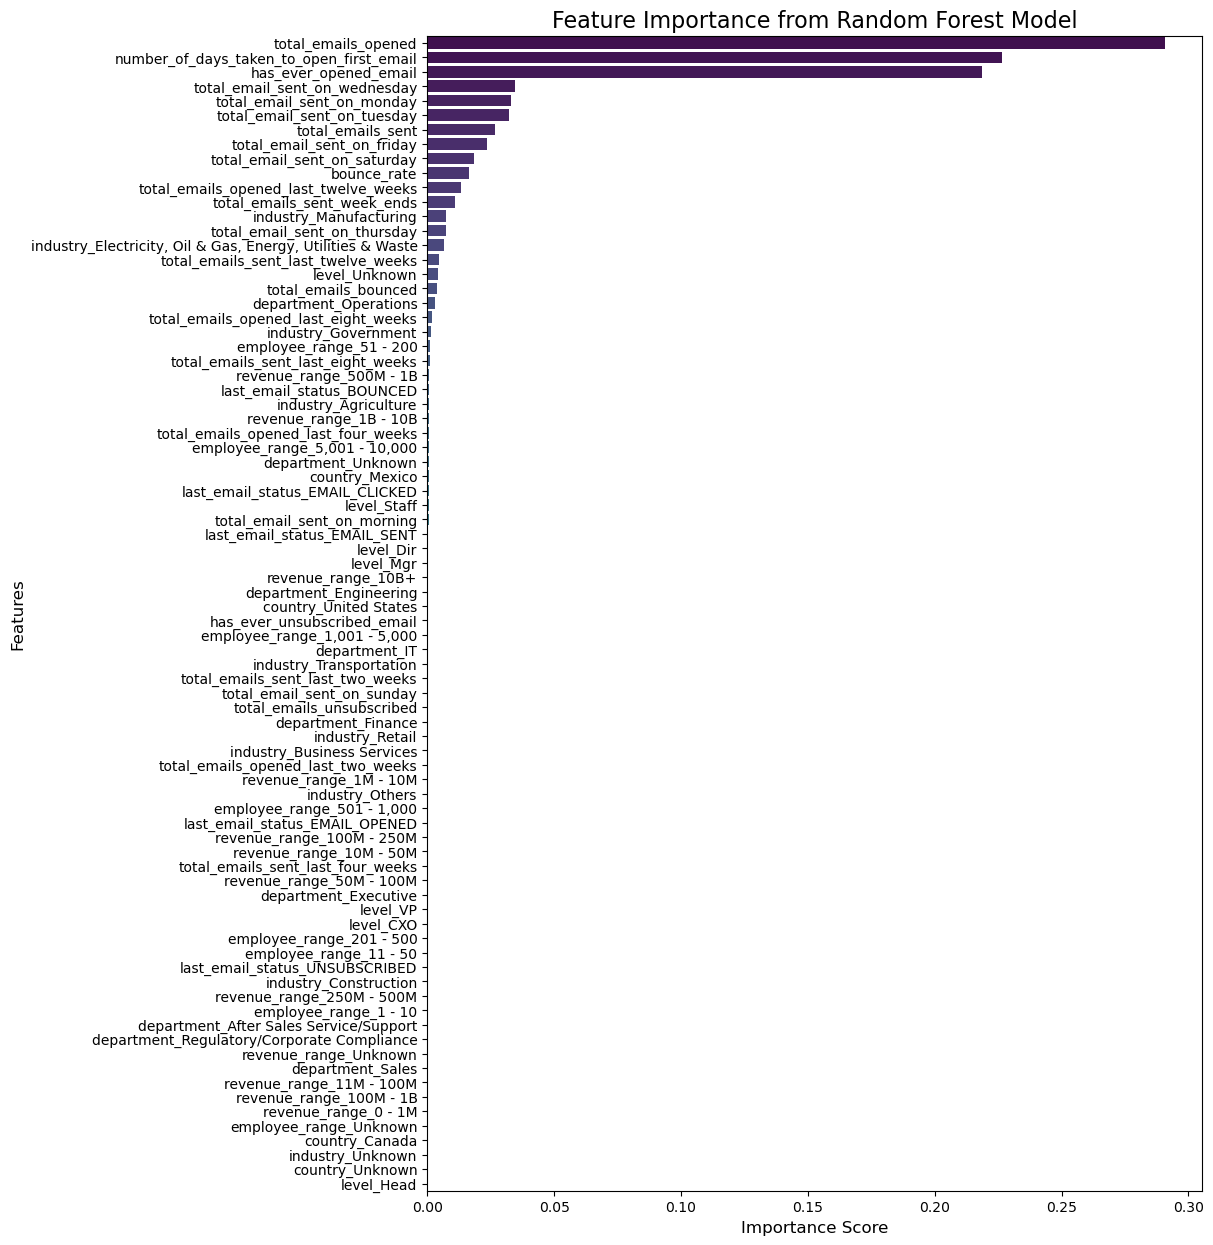

In [761]:
feature_importances = brfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [484]:
from sklearn.tree import DecisionTreeClassifier

In [506]:
dt_model=DecisionTreeClassifier(max_depth=10)

In [509]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [511]:
y_pred=dt_model.predict(X_test)

In [514]:
accuracy_score(y_test,y_pred)

0.9782822972795374

In [516]:
f1_score(y_test,y_pred)

0.8284453672463016

In [518]:
confusion_matrix(y_test,y_pred)

array([[28179,   427],
       [  234,  1596]], dtype=int64)

In [520]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28606
           1       0.79      0.87      0.83      1830

    accuracy                           0.98     30436
   macro avg       0.89      0.93      0.91     30436
weighted avg       0.98      0.98      0.98     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\1116075090.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


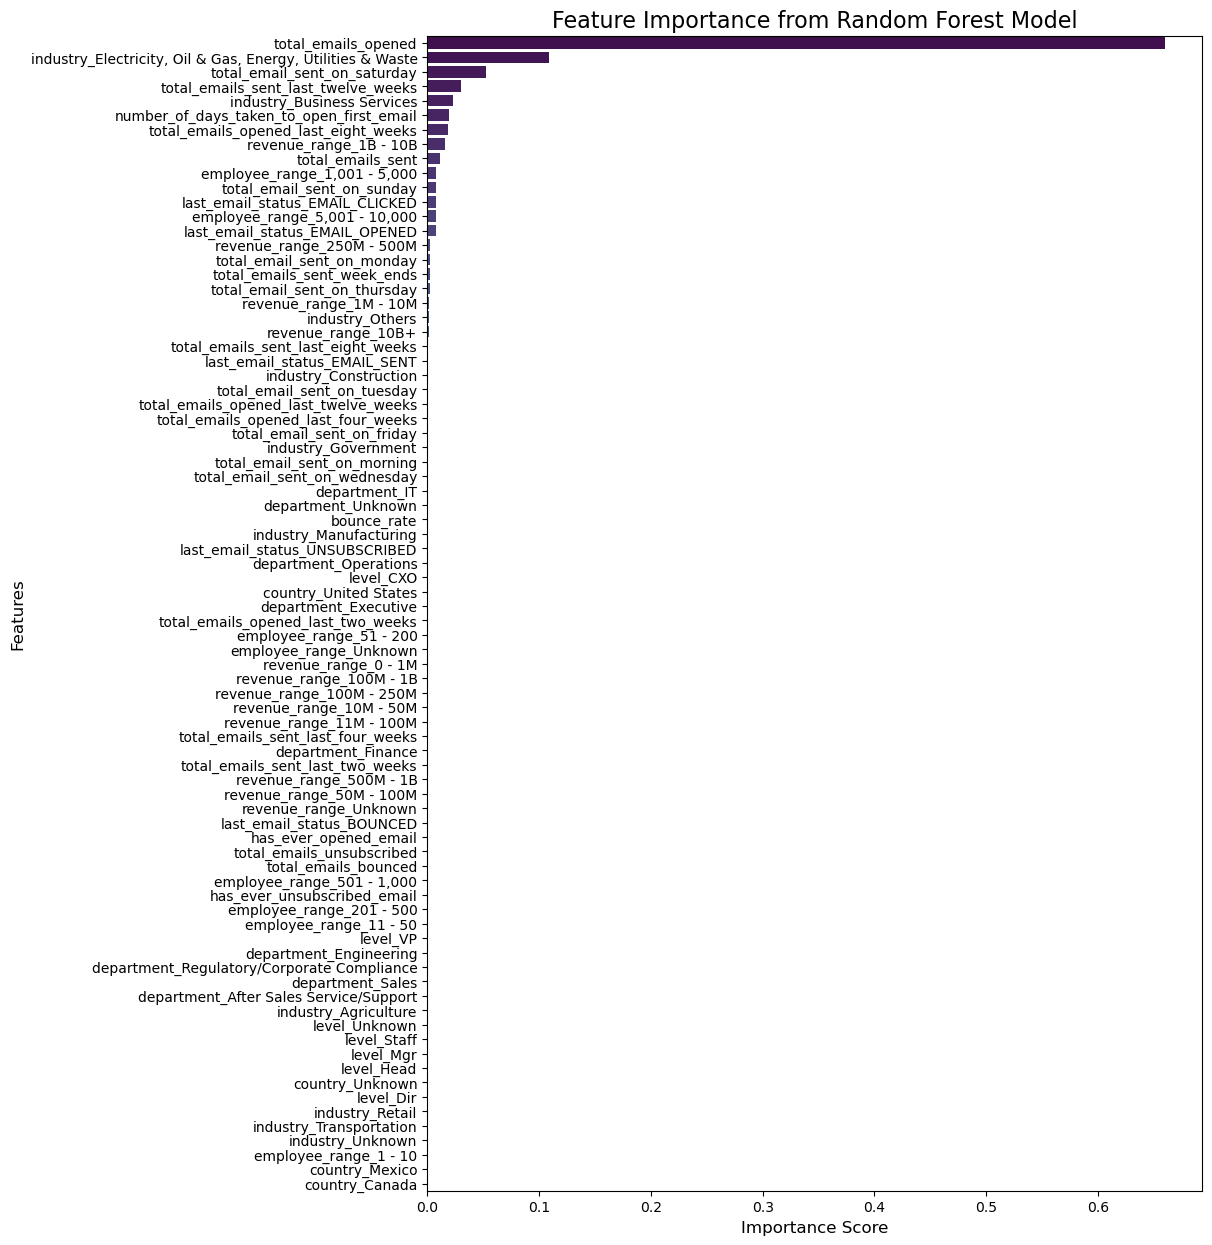

In [523]:
feature_importances = dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [525]:
dt_model_explainer=shap.Explainer(dt_model,X_train,model_output="probability")
dt_model_shap_values = dt_model_explainer(X_test)
dt_model_shap_values_class_1 = dt_model_shap_values[..., 1]

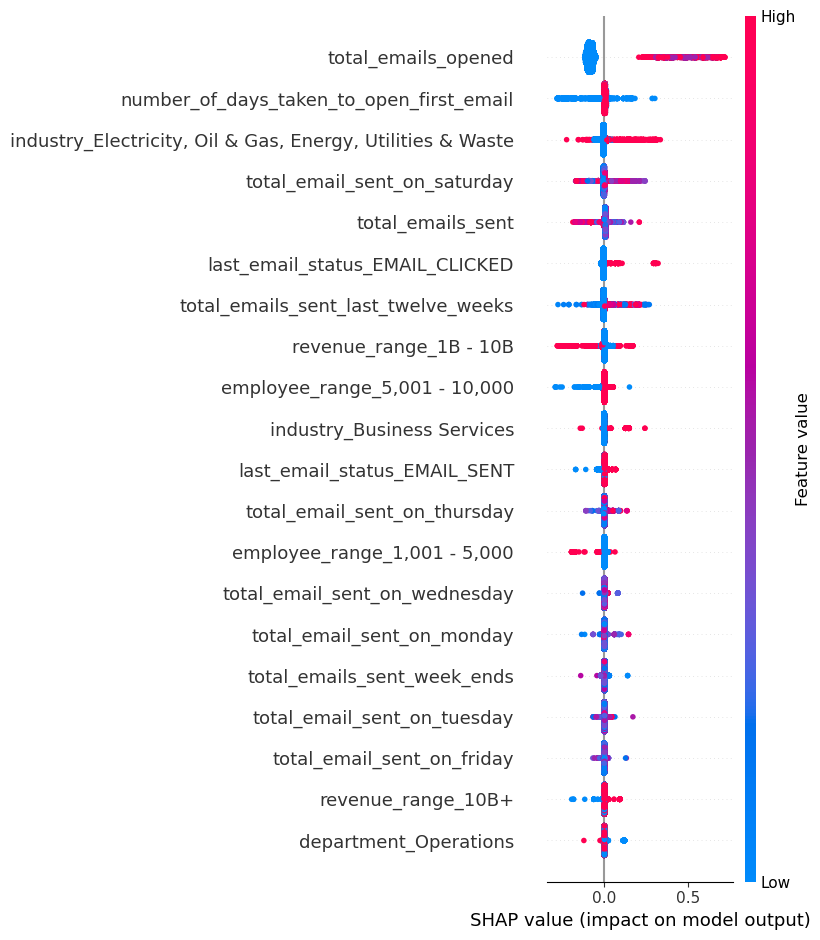

In [527]:
shap.summary_plot(dt_model_shap_values_class_1,X_test,feature_names=X_train.columns)

In [529]:
xg_model=XGBClassifier(
                             # subsample= 0.8,
                             # scale_pos_weight= 2,
                             # reg_lambda =5,
                             # reg_alpha= 1,
                             n_estimators= 50,
                             # min_child_weight= 3,
                             max_depth= 5,
                             learning_rate =0.05,
                             gamma= 1,
                             colsample_bytree= 0.6,
                            class_weight='balanced'
                      )

In [531]:
xg_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.6, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [533]:
y_pred=xg_model.predict(X_test)

In [535]:
accuracy_score(y_test,y_pred)

0.9803193586542253

In [537]:
f1_score(y_test,y_pred)

0.8206049715483678

In [539]:
confusion_matrix(y_test,y_pred)

array([[28467,   139],
       [  460,  1370]], dtype=int64)

In [541]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     28606
           1       0.91      0.75      0.82      1830

    accuracy                           0.98     30436
   macro avg       0.95      0.87      0.91     30436
weighted avg       0.98      0.98      0.98     30436



C:\Users\Admin\AppData\Local\Temp\ipykernel_32352\2602063195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


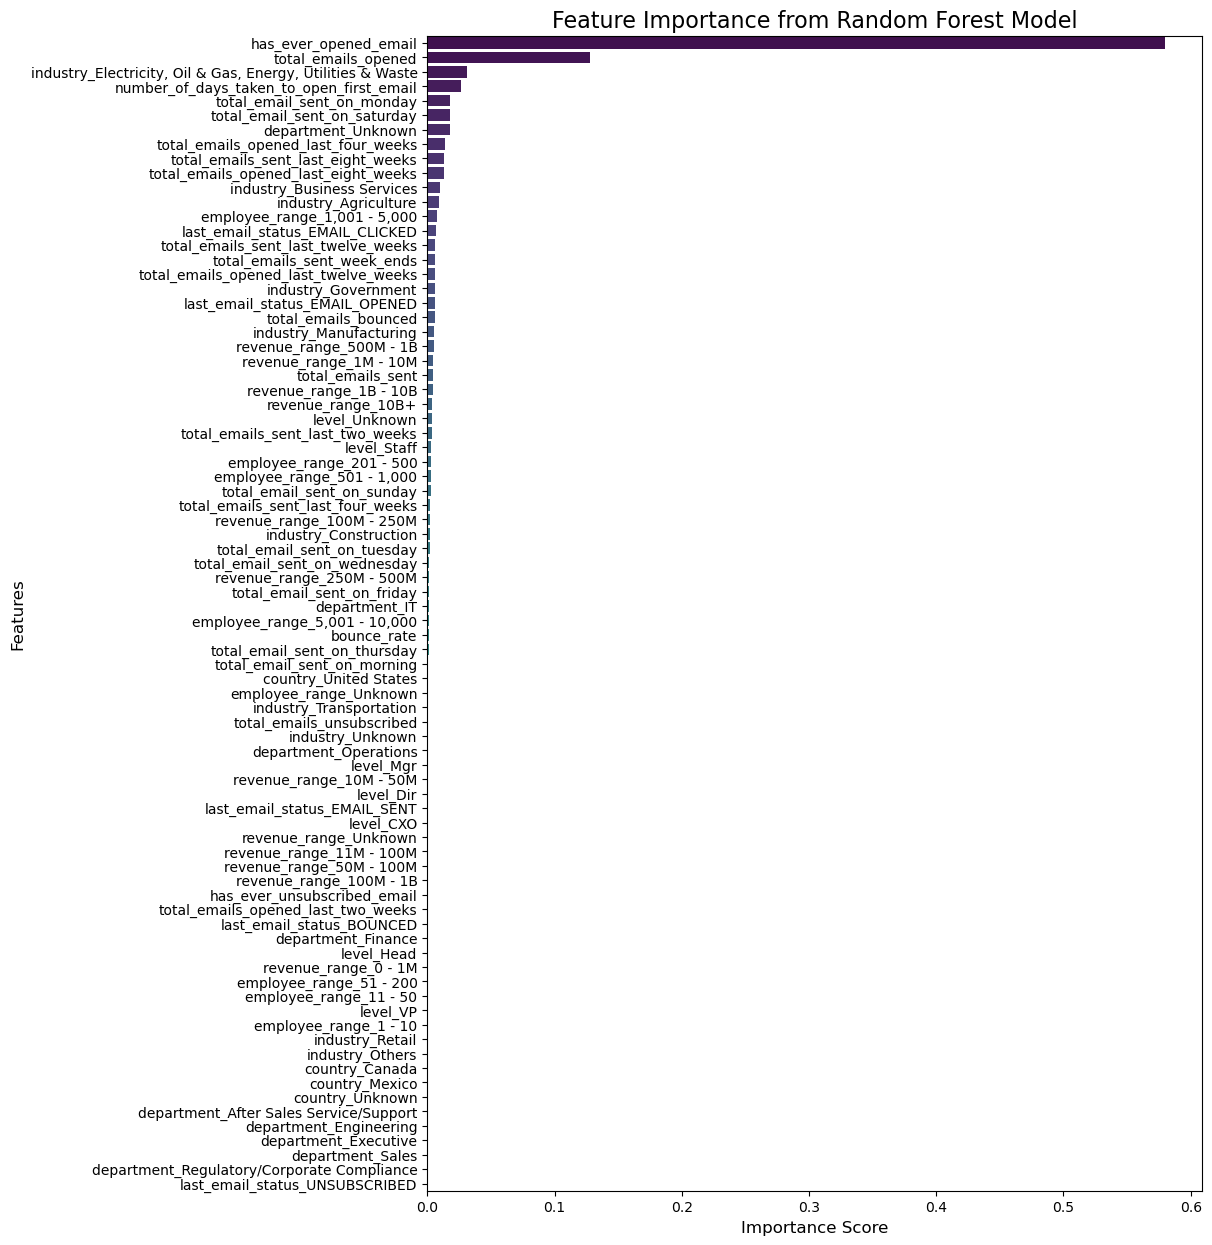

In [543]:
feature_importances = xg_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 15))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [545]:
xg_model_explainer=shap.Explainer(xg_model,X_train,model_output="probability")
xg_model_shap_values = xg_model_explainer(X_test)
xg_model_shap_values_class_1 = xg_model_shap_values[..., 1]

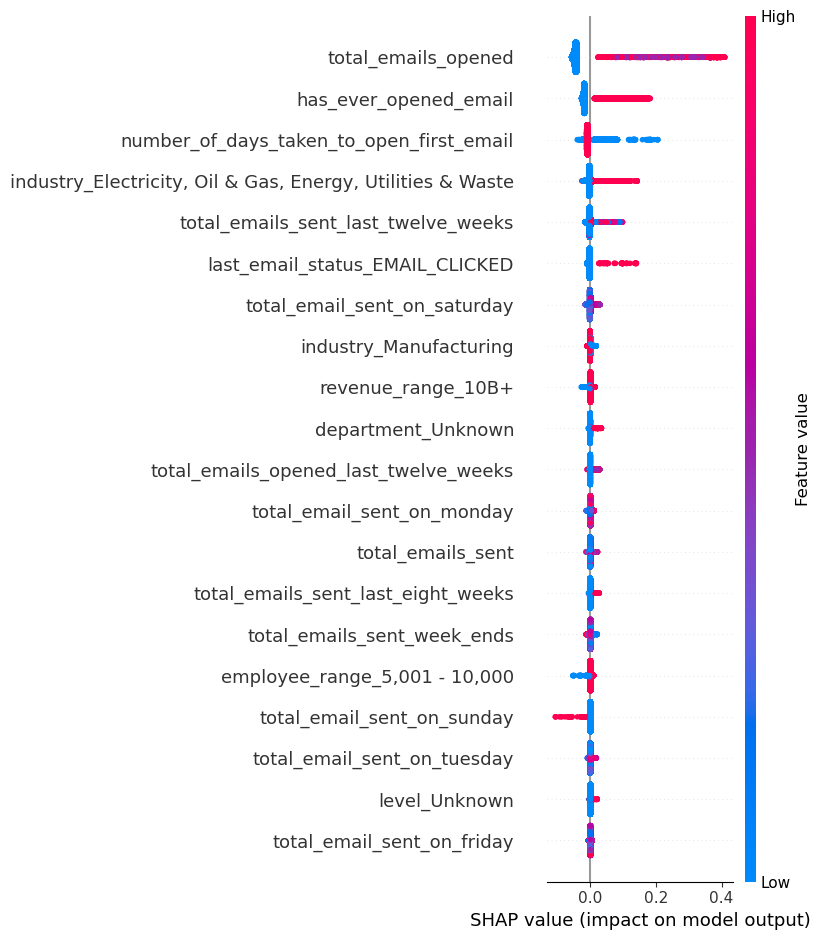

In [577]:
shap.summary_plot(xg_model_shap_values,X_test,feature_names=X_train.columns)

In [579]:
prospects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152177 entries, 0 to 152243
Data columns (total 41 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Email                                          152177 non-null  object 
 1   segment                                        152177 non-null  object 
 2   total_emails_sent                              152177 non-null  int64  
 3   total_emails_opened                            152177 non-null  int64  
 4   total_emails_clicked                           152177 non-null  int64  
 5   total_emails_bounced                           152177 non-null  int64  
 6   total_emails_unsubscribed                      152177 non-null  int64  
 7   days_since_last_email_opened                   152177 non-null  float64
 8   total_emails_sent_week_ends                    152177 non-null  float64
 9   has_ever_opened_email                     

In [581]:
from imblearn.ensemble import EasyEnsembleClassifier,RUSBoostClassifier

In [583]:
from sklearn.ensemble import AdaBoostClassifier

In [585]:
rus_model=RUSBoostClassifier(n_estimators=50,estimator=AdaBoostClassifier())

In [587]:
rus_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Adm

RUSBoostClassifier(estimator=AdaBoostClassifier())

In [589]:
y_pred=rus_model.predict(X_test)

In [591]:
accuracy_score(y_test,y_pred)

0.9600144565645946

In [593]:
f1_score(y_test,y_pred)

0.7499486336552291

In [595]:
confusion_matrix(y_test,y_pred)

array([[27394,  1212],
       [    5,  1825]], dtype=int64)

In [597]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28606
           1       0.60      1.00      0.75      1830

    accuracy                           0.96     30436
   macro avg       0.80      0.98      0.86     30436
weighted avg       0.98      0.96      0.96     30436



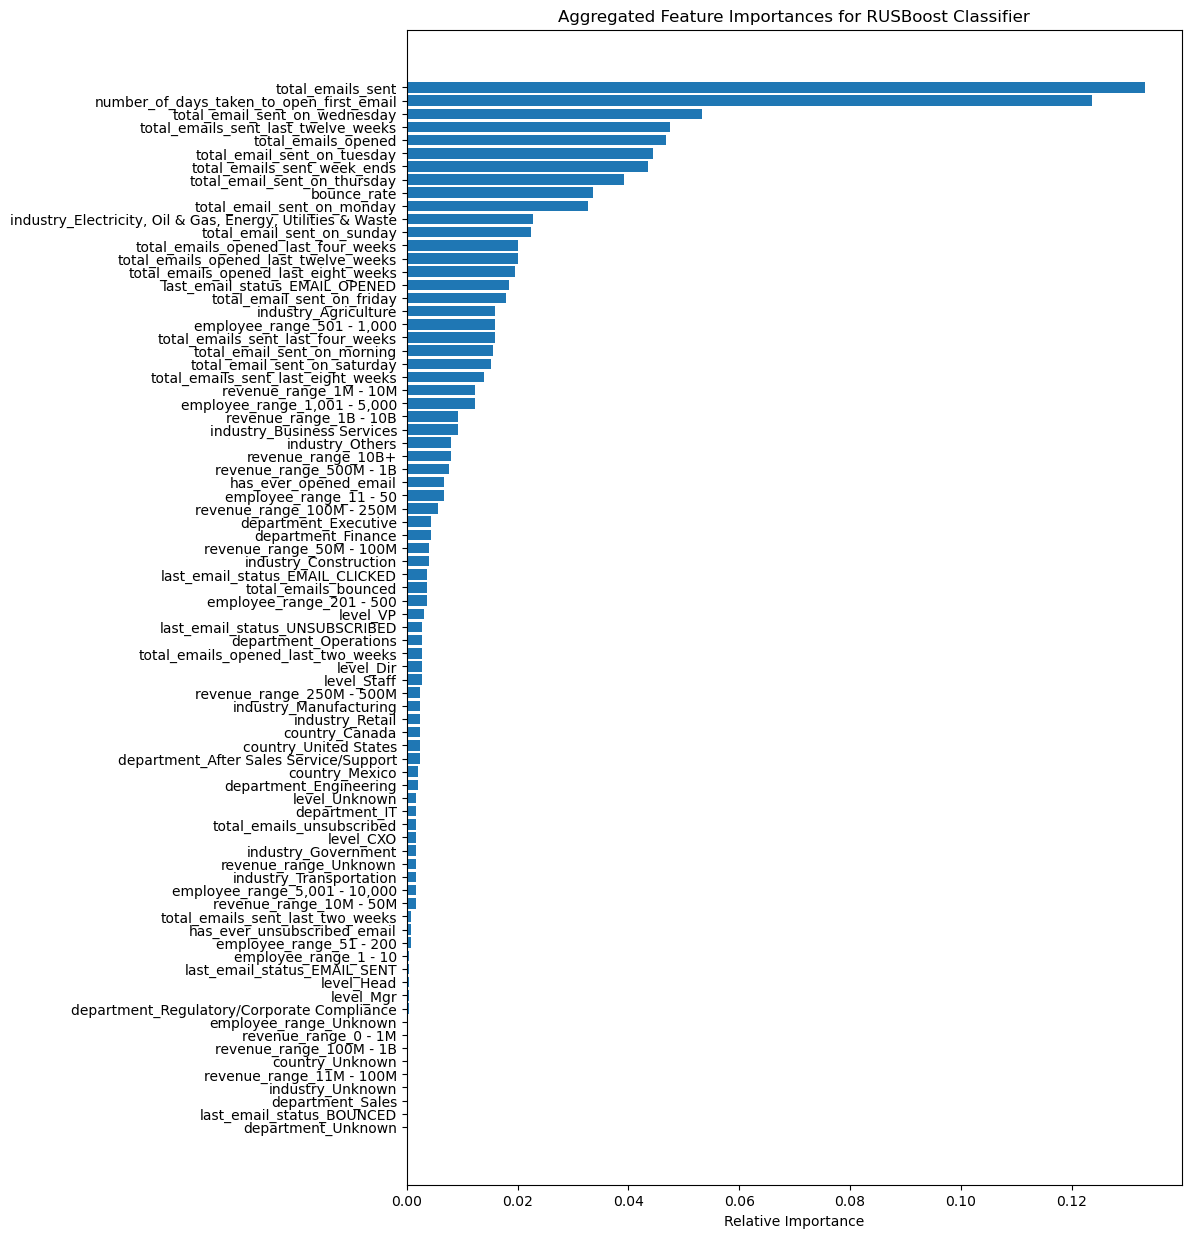

In [680]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming each base estimator in rus_model.estimators_ has feature_importances_
importances = np.zeros(X_train.shape[1])
n_estimators = len(rus_model.estimators_)

for estimator in rus_model.estimators_:
    importances += estimator.feature_importances_

# Average the importances across estimators
importances /= n_estimators

indices = np.argsort(importances)

plt.figure(figsize=(10, 15))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.title("Aggregated Feature Importances for RUSBoost Classifier")
plt.show()


In [603]:
rus_model_explainer=shap.Explainer(rus_model,X_train,model_output="probability")
# rus_model_shap_values = rus_model_explainer(X_test)
# rus_model_shap_values_class_1 = rus_model_shap_values[..., 1]

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RUSBoostClassifier(estimator=AdaBoostClassifier())

In [763]:
def model_predict(X):
    return rus_model.predict_proba(X)

rus_model_explainer = shap.Explainer(model_predict, X_train, model_output="probability")


In [765]:
rus_model_shap_values = rus_model_explainer(X_test.iloc[:5000])

PermutationExplainer explainer:   0%|▏                                            | 15/5000 [02:06<13:31:16,  9.76s/it]


KeyboardInterrupt: 

In [615]:
rus_model_shap_values.shape

(20, 80, 2)

In [617]:
rus_model_shap_values_class_1 = rus_model_shap_values[..., 1]

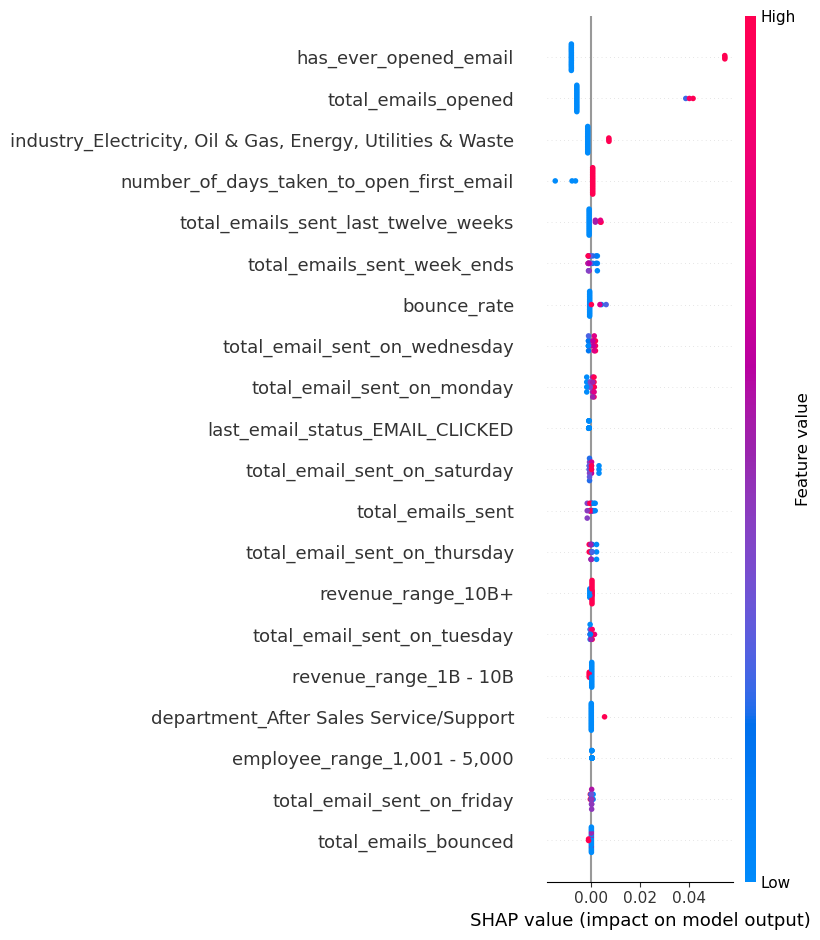

In [619]:
shap.summary_plot(rus_model_shap_values_class_1,X_test.iloc[:20],feature_names=X_train.columns)

In [662]:
easy_model=EasyEnsembleClassifier(n_estimators=50,estimator=AdaBoostClassifier())

In [664]:
easy_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Adm

EasyEnsembleClassifier(estimator=AdaBoostClassifier(), n_estimators=50)

In [666]:
y_pred=easy_model.predict(X_test)

In [668]:
accuracy_score(y_test,y_pred)

0.9588973583913787

In [670]:
f1_score(y_test,y_pred)

0.7445374719215846

In [ ]:
# 

In [682]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb

# Assume you have X (features) and y (target)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5,class_weight='balanced')
# xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42,max_depth=5,class_weight='balanced')

# Perform 5-Fold Cross Validation
rf_scores = cross_val_score(brf_model, training_df.drop(columns=['is_clicked_email']), training_df.is_clicked_email, cv=10, scoring='f1')  # Can use 'accuracy', 'roc_auc', etc.
xgb_scores = cross_val_score(rus_model, training_df.drop(columns=['is_clicked_email']), training_df.is_clicked_email, cv=10, scoring='f1')

print("BalancedRandomForest F1 Scores:", rf_scores)
print("BalancedRandomForest Average F1 Score:", rf_scores.mean())

print("RUSBoost F1 Scores:", xgb_scores)
print("RUSBoost Average F1 Score:", xgb_scores.mean())


C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin

BalancedRandomForest F1 Scores: [0.7179286  0.70797831 0.70520231 0.71905697 0.717989   0.70061256
 0.69476082 0.7201889  0.70411697 0.70601852]
BalancedRandomForest Average F1 Score: 0.7093852965855437
RUSBoost F1 Scores: [0.78819444 0.76362112 0.77288136 0.78522337 0.78824546 0.77636054
 0.76274018 0.76942568 0.75956739 0.76916596]
RUSBoost Average F1 Score: 0.7735425509685832


In [684]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [686]:
## rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, 
#                                   min_samples_split=10, min_samples_leaf=5, 
#                                   random_state=42,class_weight='balanced')

# Create Stratified K-Fold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Stratified Cross-Validation
cv_scores = cross_val_score(brf_model,training_df.drop(columns=['is_clicked_email']), training_df.is_clicked_email, cv=stratified_kfold, scoring='f1')

# Print Results
print("Stratified Cross-Validation F1 Scores:", cv_scores)
print("Mean Stratified Cross-Validation F1 Score:", np.mean(cv_scores))

C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Admin

Stratified Cross-Validation F1 Scores: [0.70920502 0.70675472 0.70782084]
Mean Stratified Cross-Validation F1 Score: 0.7079268607919585


In [766]:
## rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, 
#                                   min_samples_split=10, min_samples_leaf=5, 
#                                   random_state=42,class_weight='balanced')

# Create Stratified K-Fold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Stratified Cross-Validation
cv_scores = cross_val_score(rus_model,training_df.drop(columns=['is_clicked_email']), training_df.is_clicked_email, cv=stratified_kfold, scoring='f1')

# Print Results
print("Stratified Cross-Validation F1 Scores:", cv_scores)
print("Mean Stratified Cross-Validation F1 Score:", np.mean(cv_scores))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Adm

Stratified Cross-Validation F1 Scores: [0.77772087 0.76682632 0.77613463]
Mean Stratified Cross-Validation F1 Score: 0.773560604328685
